In [20]:

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.layers import Input, Flatten, Embedding, multiply, Dropout
from keras.optimizers import Adam
from keras import initializers
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.layers import Input, Flatten, Embedding, multiply, Dropout
from keras.layers import Concatenate, GaussianNoise,Activation
from keras.optimizers import Adam
from keras.utils import np_utils, to_categorical
from keras import initializers
from keras import backend as K

[[[ 0.03776023 -0.00824963]
  [-0.04877186  0.030853  ]
  [-0.01231469 -0.04367311]
  [-0.04678584  0.04472027]
  [ 0.02257991  0.02617644]
  [ 0.02229757 -0.01649895]
  [ 0.024586   -0.02258464]
  [ 0.03942456 -0.01603343]
  [ 0.04727579  0.00072814]
  [ 0.01355512 -0.03978248]]]


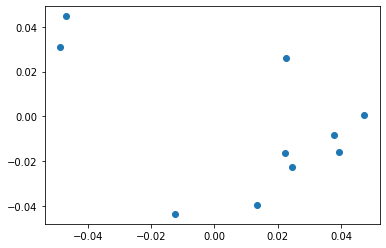

In [22]:
model = Sequential()
model.add(Embedding(10, 2))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

# input_array = np.random.randint(10, size=(1, 10))
input_array = np.arange(0, 10).reshape(1, -1)
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array)
# print(output_array.shape)
plt.scatter(output_array[0, :, 0], output_array[0, :, 1])

In [23]:
!git clone https://github.com/kyk0325v/CGAN-only_1000.git

fatal: destination path 'CGAN-only_1000' already exists and is not an empty directory.


In [24]:
import tensorflow as tf

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator()
batch_size = 40000 

images = []

In [26]:
obj = generator.flow_from_directory(
    'C:/Users/4/Downloads/CGAN-only_1000',
    target_size = (64, 64),
    batch_size = batch_size,
    class_mode = 'binary')
 
 
    # for i in enumerate(range(iterations)):
#     img, label = obj .next()
#     n_img = len(label)
    
#     base = cv2.cvtColor(img[0], cv2.COLOR_RGB2BGR)  # keras는 RGB, openCV는 BGR이라 변경함
#     for idx in range(n_img - 1):
#         img2 = cv2.cvtColor(img[idx + 1], cv2.COLOR_RGB2BGR)
#         base = np.hstack((base, img2))
#     images.append(base)
 
# img = images[0]
# for idx in range(len(images) - 1):
#     img = np.vstack((img, images[idx + 1]))
# cv2.imshow('result', img) #Colored by Color Scripter

Found 9000 images belonging to 10 classes.


In [27]:
X_train = next(obj)[0]
y_train = next(obj)[1]

In [28]:
for i in range(len(y_train)):
    new = y_train[i] - 1
    y_train[i] = new

In [29]:
num_classes = len(np.unique(y_train))
print(num_classes)

class_names = ["1","2","3","4","5","6","7","8","9"]
print(len(class_names))

9
9


In [30]:
#Y_train = np_utils.to_categorical(y_train)

X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

print('X_train reshape:', X_train.shape)
#print('Y_train reshape:', Y_train.shape)

X_train reshape: (9000, 64, 64, 3)


In [37]:
# latent space dimension
z = Input(shape=(100,))

# classes
labels = Input(shape=(9,))

# Generator network
merged_layer = Concatenate()([z, labels])

# FC: 2x2x512
generator = Dense(2*2*512, activation='relu')(merged_layer)
generator = BatchNormalization(momentum=0.9)(generator)
generator = LeakyReLU(alpha=0.1)(generator)
generator = Reshape((2, 2, 512))(generator)

# # Conv 1: 4x4x256
generator = Conv2DTranspose(256, kernel_size=5, strides=2, padding='same')(generator)
generator = BatchNormalization(momentum=0.9)(generator)
generator = LeakyReLU(alpha=0.1)(generator)

# Conv 2: 8x8x128
generator = Conv2DTranspose(128, kernel_size=5, strides=2, padding='same')(generator)
generator = BatchNormalization(momentum=0.9)(generator)
generator = LeakyReLU(alpha=0.1)(generator)

# Conv 3: 16x16x64
generator = Conv2DTranspose(64, kernel_size=5, strides=2, padding='same')(generator)
generator = BatchNormalization(momentum=0.9)(generator)
generator = LeakyReLU(alpha=0.1)(generator)

# Conv 4: 32x32x3
generator = Conv2DTranspose(32, kernel_size=5, strides=2, padding='same')(generator)
generator = BatchNormalization(momentum=0.9)(generator)
generator = LeakyReLU(alpha=0.1)(generator)

# Conv 4: 64x64x3
generator = Conv2DTranspose(3, kernel_size=5, strides=2, padding='same', activation='tanh')(generator)

# generator = Model(inputs=[z, labels], outputs=out_g)
generator = Model(inputs=[z, labels], outputs=generator, name='generator')

# prints a summary representation of your model
generator.summary()

Model: "generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 109)          0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 2048)         225280      concatenate_5[0][0]      

In [38]:
# input image
img_input = Input(shape=(X_train[0].shape))

# Conv 1: 16x16x64
discriminator = Conv2D(32, kernel_size=5, strides=2, padding='same')(img_input)
discriminator = BatchNormalization(momentum=0.9)(discriminator)
discriminator = LeakyReLU(alpha=0.1)(discriminator)

# Conv 1: 16x16x64
discriminator = Conv2D(64, kernel_size=5, strides=2, padding='same')(img_input)
discriminator = BatchNormalization(momentum=0.9)(discriminator)
discriminator = LeakyReLU(alpha=0.1)(discriminator)

# Conv 2:
discriminator = Conv2D(128, kernel_size=5, strides=2, padding='same')(discriminator)
discriminator = BatchNormalization(momentum=0.9)(discriminator)
discriminator = LeakyReLU(alpha=0.1)(discriminator)

# Conv 3: 
discriminator = Conv2D(256, kernel_size=5, strides=2, padding='same')(discriminator)
discriminator = BatchNormalization(momentum=0.9)(discriminator)
discriminator = LeakyReLU(alpha=0.1)(discriminator)

# Conv 4: 
discriminator = Conv2D(512, kernel_size=5, strides=2, padding='same')(discriminator)
discriminator = BatchNormalization(momentum=0.9)(discriminator)
discriminator = LeakyReLU(alpha=0.1)(discriminator)

# FC
discriminator = Flatten()(discriminator)

# Concatenate 
merged_layer = Concatenate()([discriminator, labels])
discriminator = Dense(512, activation='relu')(merged_layer)
    
# Output
discriminator = Dense(1, activation='sigmoid')(discriminator)

discriminator = Model(inputs=[img_input, labels], outputs=discriminator, name='discriminator')


# prints a summary representation of your model
discriminator.summary()

Model: "discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 64)   4864        input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 32, 32, 64)   256         conv2d_12[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_27 (LeakyReLU)      (None, 32, 32, 64)   0           batch_normalization_27[0][0]     
______________________________________________________________________________________

In [39]:
# # Optimizer
discriminator.compile(Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy',
                      metrics=['binary_accuracy'])

In [40]:

discriminator.trainable = False

label = Input(shape=(9,), name='label')
z = Input(shape=(100,), name='z')

fake_img = generator([z, label])
validity = discriminator([fake_img, label])

d_g = Model([z, label], validity, name='adversarial')

d_g.compile(Adam(lr=0.0004, beta_1=0.5), loss='binary_crossentropy',
            metrics=['binary_accuracy'])

# prints a summary representation of your model
d_g.summary()

Model: "adversarial"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
z (InputLayer)                  (None, 100)          0                                            
__________________________________________________________________________________________________
label (InputLayer)              (None, 9)            0                                            
__________________________________________________________________________________________________
generator (Model)               (None, 64, 64, 3)    4590275     z[0][0]                          
                                                                 label[0][0]                      
__________________________________________________________________________________________________
discriminator (Model)           (None, 1)            8510337     generator[1][0]        

In [41]:
real_labels = to_categorical(y_train[i*batch_size:(i+1)*batch_size].reshape(-1, 1), num_classes=9)
real_labels

array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0.

In [36]:
epochs = 300
batch_size = 64
smooth = 0.1
latent_dim = 100

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        real_labels = to_categorical(y_train[i*batch_size:(i+1)*batch_size].reshape(-1, 1), num_classes=9)
        
        d_loss_real = discriminator.train_on_batch(x=[X_batch, real_labels],
                                                   y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = to_categorical(np.random.randint(0, 9, batch_size).reshape(-1, 1), num_classes=9)
        X_fake = generator.predict_on_batch([z, random_labels])
        
        d_loss_fake = discriminator.train_on_batch(x=[X_fake, random_labels], y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        random_labels = to_categorical(np.random.randint(0, 9, batch_size).reshape(-1, 1), num_classes=9)
        d_g_loss_batch = d_g.train_on_batch(x=[z, random_labels], y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 9
        z = np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        labels = to_categorical(np.arange(0, 9).reshape(-1, 1), num_classes=9)
        
        x_fake = generator.predict([z, labels])
        x_fake = np.clip(x_fake, -1, 1)
        x_fake = (x_fake + 1) * 127
        x_fake = np.round(x_fake).astype('uint8')

        
        fig = plt.figure(figsize=(8,8)) # rows*cols 행렬의 i번째 subplot 생성
        rows = 3
        cols = 3
        i = 1
        
        for k in range(samples):
            ax = fig.add_subplot(rows, cols, i)
            ax.imshow(x_fake[k])
            ax.set_title(class_names[k])
            ax.set_xticks([]), ax.set_yticks([])
            i += 1
#         for k in range(samples):
#             plt.figure(figsize=(10,10))
#             plt.subplot(3, 3, k + 1, xticks=[], yticks=[])
#             #plt.subplot(1, 9, k + 1, xticks=[], yticks=[])
#             plt.imshow(x_fake[k])
#             plt.title(class_names[k])

        plt.tight_layout()
        plt.show()

KeyboardInterrupt: 

In [ ]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()